In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

from IPython.display import display, HTML

In [2]:
CLUSTER_DICT = {
    'uraian_jenis_perusahaan': 'Uraian Jenis Perusahaan',
    'uraian_risiko_proyek' : 'Uraian Risiko Proyek',
    'skala_usaha': 'Skala Usaha',
    'golongan_kbli': 'Golongan KBLI',
}

In [3]:
TARGET_COLUMN = 'uraian_risiko_proyek'

In [4]:
df = pd.read_csv('transform_datasets/transform_df_'+ TARGET_COLUMN +'.csv')
df.set_index('kecamatan', inplace=True)

In [5]:
df

,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi
kecamatan,,,,
Amurang,16,19,225,182
Amurang Barat,9,11,106,103
Suluun Tareran,1,8,40,6
Tumpaan,9,17,132,64
Amurang Timur,10,16,106,130
Tenga,3,4,41,27
Maesaan,1,1,26,31
Motoling,2,17,49,9
Motoling Timur,3,4,51,35


## Menentukan Jumlah Cluster

### Elbow Method

In [6]:
def visualizeElbow(df, KmeansModel):
    visualizer = KElbowVisualizer(KmeansModel, k=(2,10))
    visualizer.fit(df)
    visualizer.show()

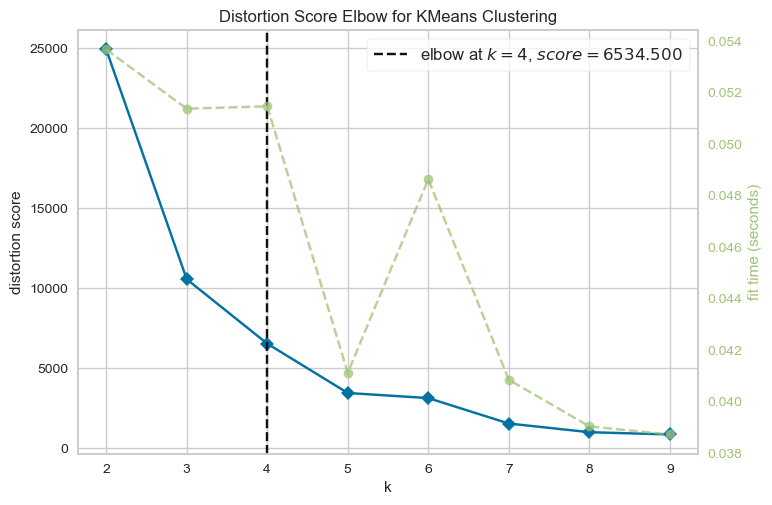

In [7]:
model = KMeans(
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)

visualizeElbow(df, model)

### Silhouette Method

In [8]:
def visualizeSilhouette(df, KmeansModel):
    visualizer = SilhouetteVisualizer(KmeansModel, colors='yellowbrick')
    visualizer.fit(df)
    visualizer.show()

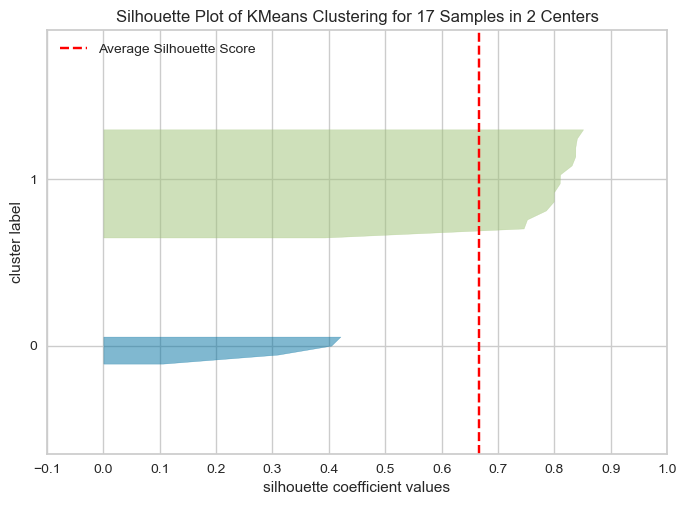

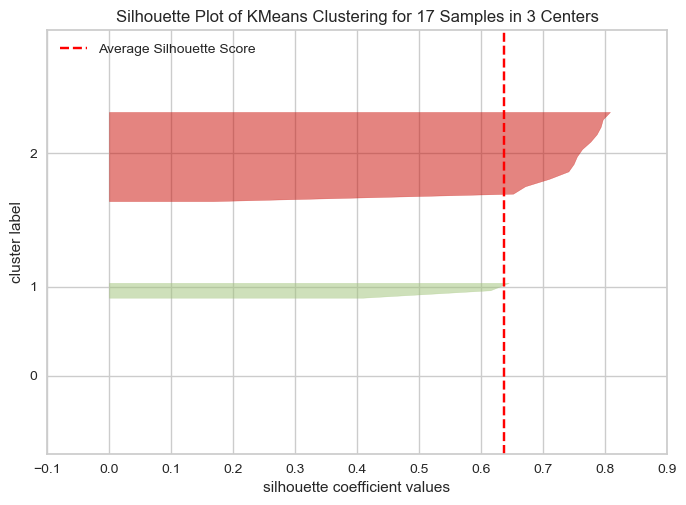

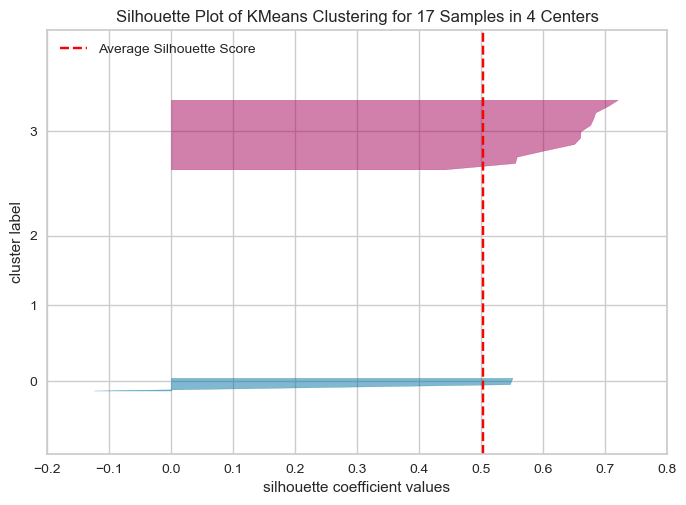

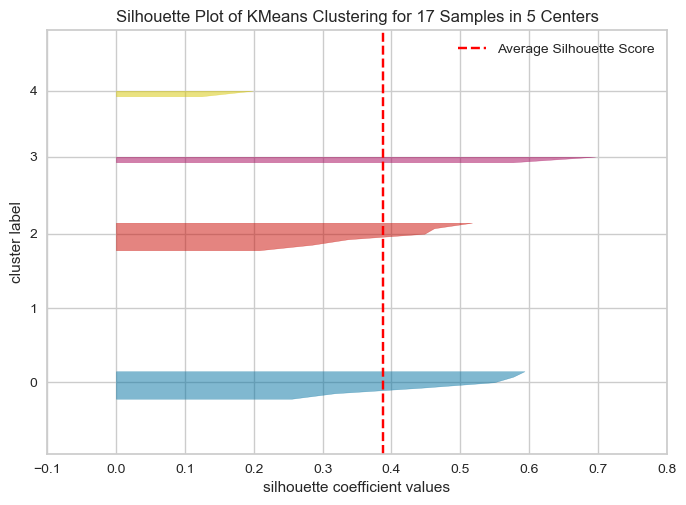

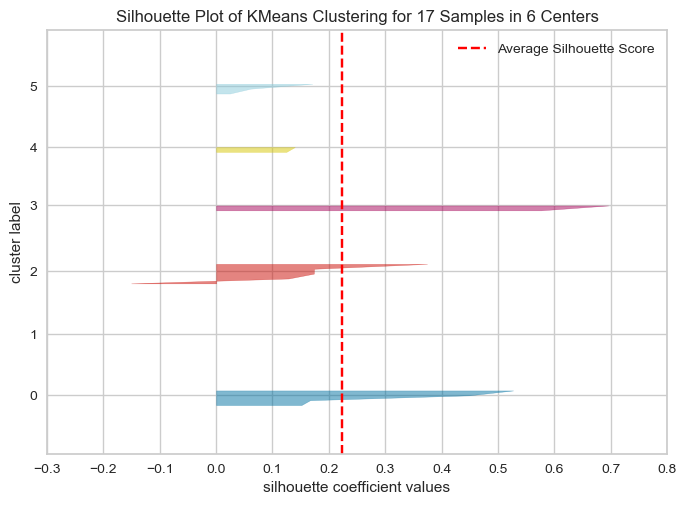

In [9]:
for n_cluster in range(2,7):
    model = KMeans(
        init="random",
        n_clusters=n_cluster,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    visualizeSilhouette(df, model)

# Kmeans Clustering

In [10]:
NUMBER_OF_CLUSTER = 4

In [11]:
kmeans = KMeans(
    init="random",
    n_clusters=NUMBER_OF_CLUSTER,
    n_init=10,
    max_iter=300,
    random_state=42
)
clusters_label = kmeans.fit_predict(df)

In [12]:
clusters_label

array([2, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3])

In [13]:
clusters_label_mapped = list(map(lambda x: 'C' + str(x), clusters_label))

In [14]:
df['cluster'] = clusters_label_mapped

In [15]:
df

,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi,cluster
kecamatan,,,,,
Amurang,16,19,225,182,C2
Amurang Barat,9,11,106,103,C0
Suluun Tareran,1,8,40,6,C3
Tumpaan,9,17,132,64,C0
Amurang Timur,10,16,106,130,C0
Tenga,3,4,41,27,C3
Maesaan,1,1,26,31,C3
Motoling,2,17,49,9,C3
Motoling Timur,3,4,51,35,C3


# Deskripsi Cluster

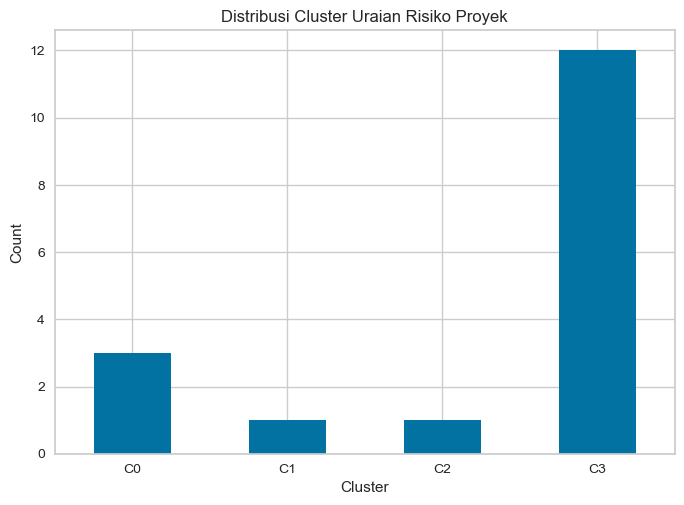

In [16]:
df['cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Cluster', rotation=0)
plt.ylabel('Count')
plt.title('Distribusi Cluster ' + CLUSTER_DICT[TARGET_COLUMN])
plt.show()

In [17]:
for cluster in df.cluster.unique():
    print("\nData ", CLUSTER_DICT[TARGET_COLUMN], "cluster: ", cluster)
    display_df = df.loc[df.cluster == cluster]
    display(HTML(display_df.to_html()))
    print('Deskripsi cluster')
    display(HTML(display_df.describe().to_html()))
    
    
    
    
    print('\n\n\n\n----------------------------------------------------------------------')


Data  Uraian Risiko Proyek cluster:  C2


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi,cluster
kecamatan,,,,,
Amurang,16,19,225,182,C2


Deskripsi cluster


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi
count,1.0,1.0,1.0,1.0
mean,16.0,19.0,225.0,182.0
std,NaN,NaN,NaN,NaN
min,16.0,19.0,225.0,182.0
25%,16.0,19.0,225.0,182.0
50%,16.0,19.0,225.0,182.0
75%,16.0,19.0,225.0,182.0
max,16.0,19.0,225.0,182.0






----------------------------------------------------------------------

Data  Uraian Risiko Proyek cluster:  C0


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi,cluster
kecamatan,,,,,
Amurang Barat,9,11,106,103,C0
Tumpaan,9,17,132,64,C0
Amurang Timur,10,16,106,130,C0


Deskripsi cluster


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi
count,3.000000,3.000000,3.000000,3.00000
mean,9.333333,14.666667,114.666667,99.00000
std,0.577350,3.214550,15.011107,33.18132
min,9.000000,11.000000,106.000000,64.00000
25%,9.000000,13.500000,106.000000,83.50000
50%,9.000000,16.000000,106.000000,103.00000
75%,9.500000,16.500000,119.000000,116.50000
max,10.000000,17.000000,132.000000,130.00000






----------------------------------------------------------------------

Data  Uraian Risiko Proyek cluster:  C3


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi,cluster
kecamatan,,,,,
Suluun Tareran,1,8,40,6,C3
Tenga,3,4,41,27,C3
Maesaan,1,1,26,31,C3
Motoling,2,17,49,9,C3
Motoling Timur,3,4,51,35,C3
Tompaso Baru,3,4,33,44,C3
Ranoyapo,0,5,20,6,C3
Tareran,0,12,55,38,C3
Motoling Barat,0,4,27,2,C3


Deskripsi cluster


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi
count,12.000000,12.000000,12.000000,12.000000
mean,1.583333,6.416667,39.166667,20.500000
std,1.443376,4.273775,10.861386,14.582056
min,0.000000,1.000000,20.000000,2.000000
25%,0.000000,4.000000,31.500000,6.750000
50%,1.500000,5.500000,40.000000,20.500000
75%,3.000000,6.500000,48.250000,32.000000
max,4.000000,17.000000,55.000000,44.000000






----------------------------------------------------------------------

Data  Uraian Risiko Proyek cluster:  C1


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi,cluster
kecamatan,,,,,
Modoinding,1,11,105,21,C1


Deskripsi cluster


,Tinggi,Menengah Rendah,Rendah,Menengah Tinggi
count,1.0,1.0,1.0,1.0
mean,1.0,11.0,105.0,21.0
std,NaN,NaN,NaN,NaN
min,1.0,11.0,105.0,21.0
25%,1.0,11.0,105.0,21.0
50%,1.0,11.0,105.0,21.0
75%,1.0,11.0,105.0,21.0
max,1.0,11.0,105.0,21.0






----------------------------------------------------------------------


### Simpan Hasil Cluster